<a href="https://colab.research.google.com/github/AlexanderOntiveros/IAyRN-2001598/blob/main/AF6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"AF6: Aprendizaje supervisado, árbol de decisión" **

**Integrantes: **

Rodrigo Alexander Ontiveros Mendez 2001598 IMC

Luis Enrique Salazar Matrón 2047932 IMC

Andrés Murguía Valencia 2173973 IMC

Diego Maltos Rodríguez 2062661 IMC

**Horario de Clase:** Martes / N4-N6 ⏰

Conjunto de datos Breast Cancer. MAS INFORMACION:


*   https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data?select=data.csv
*   https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic




In [47]:
#1. Importar Librerias
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
import pandas as pd

In [48]:
#2. Cargar conjunto de datos
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
labels = pd.Series(cancer.target)

# Prepare data for modeling
X = cancer.data
y = cancer.target

In [49]:
len(y)

569

In [50]:
y[0]

np.int64(0)

In [51]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [52]:
#3. Preprocesamiento ( Dividir los datos en conjunto de entrenamiento y prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
#4 Selección y entrenamiento del modelo
# /Inicializar y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
# Exactitud del modelo en el entrenamiento.
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)

1.0


In [55]:
#5. Prueba del modelo.
"""Predecir con el conjunto de prueba"""
y_pred = clf.predict(X_test)

In [56]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

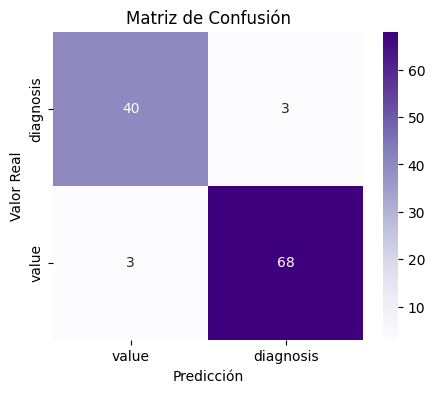

In [57]:
# Mostrar la matriz de confusión de resultados de la prueba
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples", xticklabels=['value', 'diagnosis'], yticklabels=['diagnosis', 'value'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [58]:
#Predicción 1
print(y_pred[1])
print(y_test[1])

0
0


In [59]:
#Predicción 2
print(y_pred[20])
print(y_test[20])

1
0


In [60]:
#Predicción 3
print(y_pred[-1])
print(y_test[-1])

0
0


In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



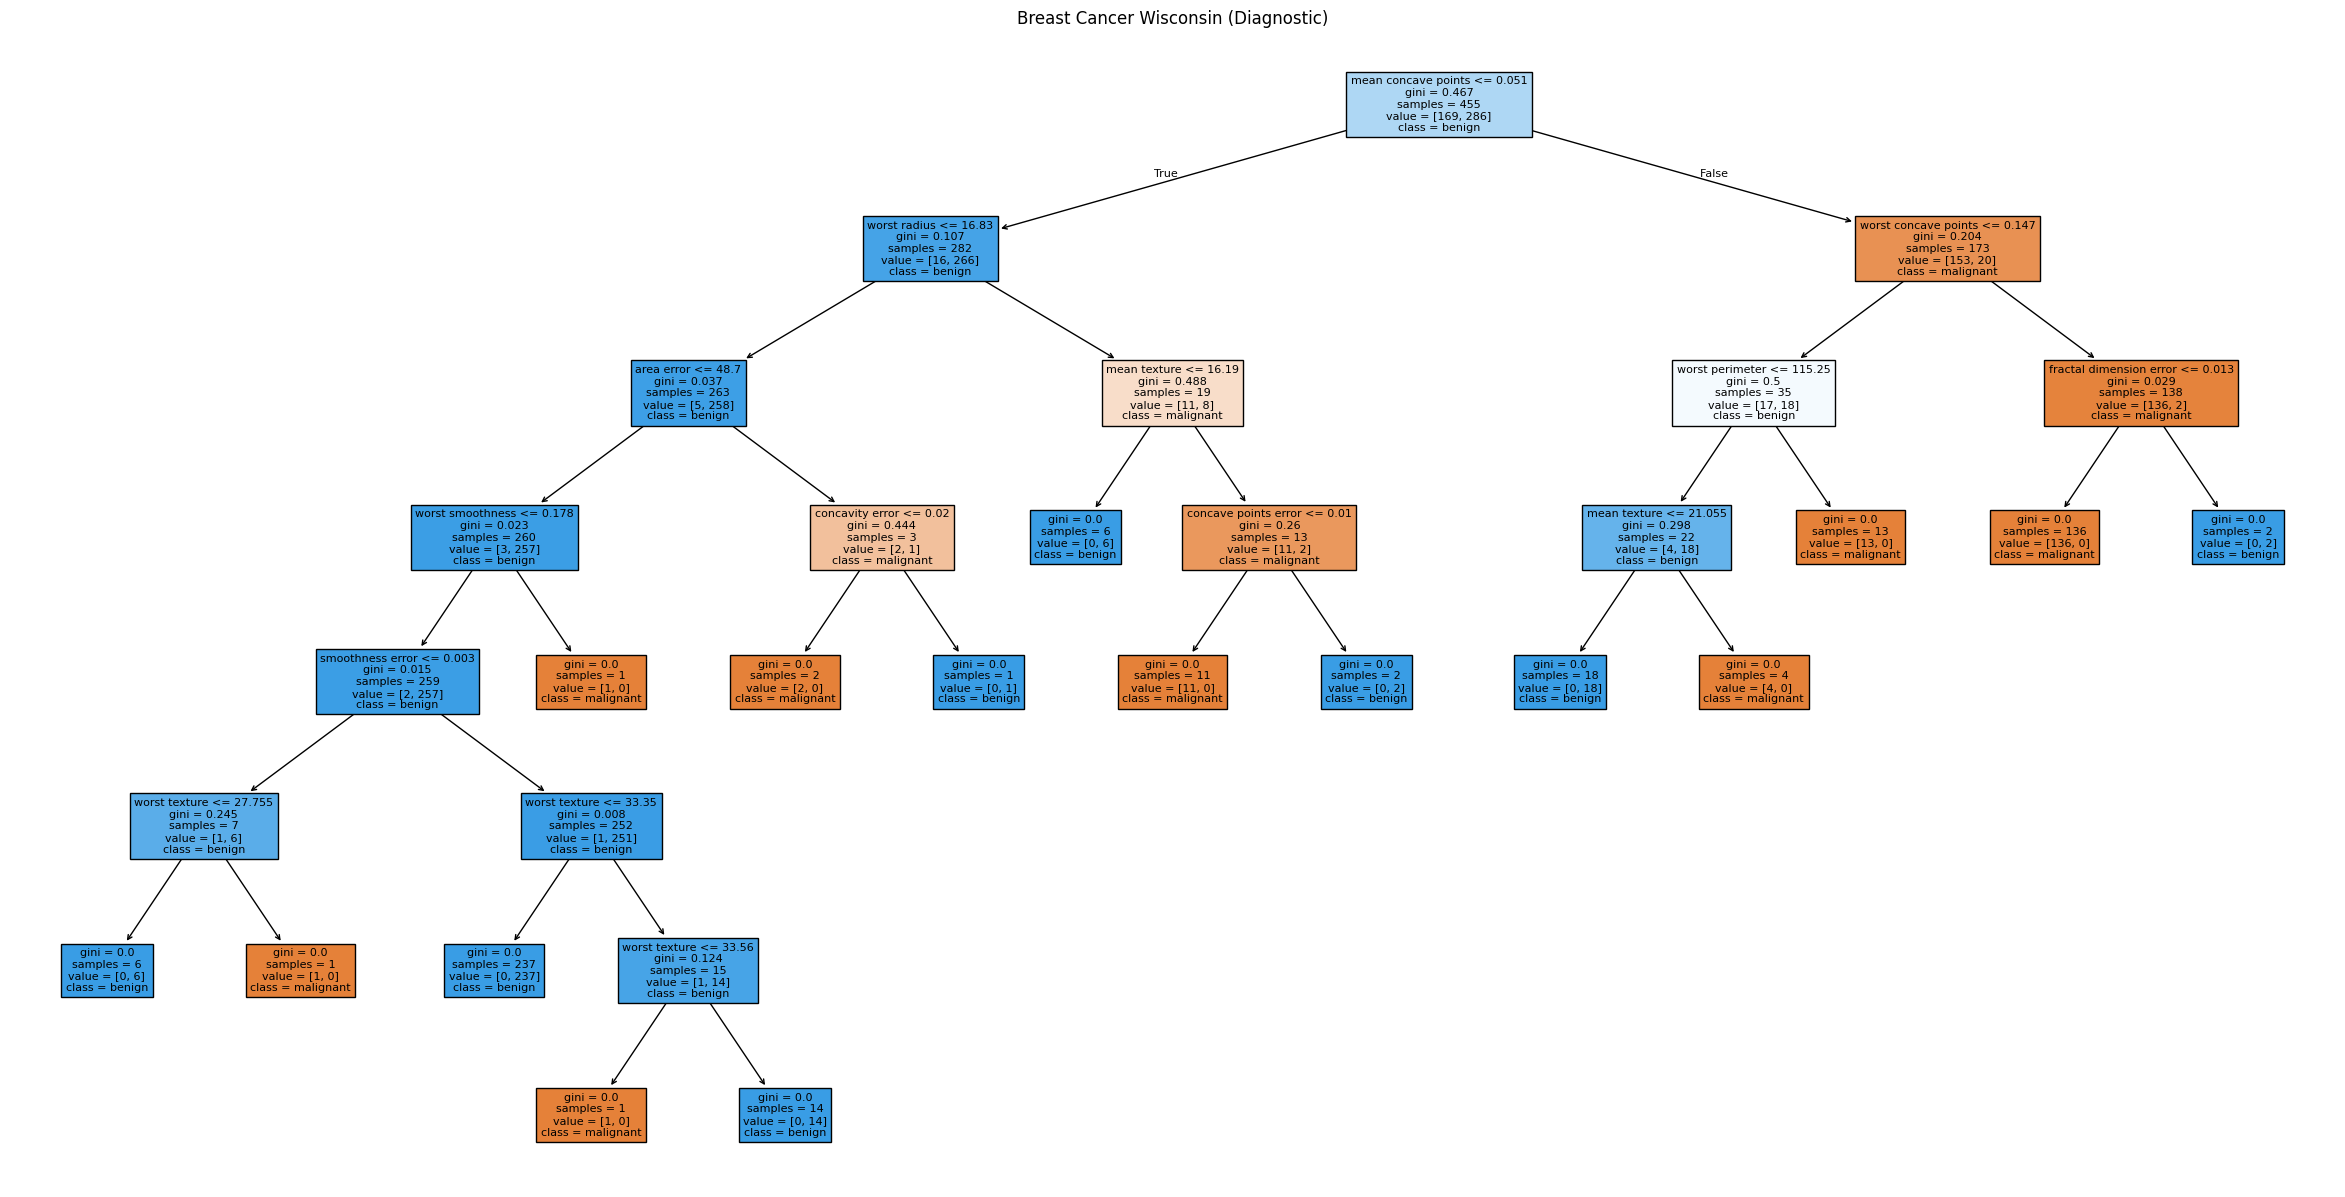

In [62]:
# Visualizar el árbol de decisión
plt.figure(figsize=(30, 15))  # resolution
plot_tree(clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.title("Breast Cancer Wisconsin (Diagnostic)")
plt.savefig("Breast_Cancer.png", dpi=300)  # Increase DPI for better resolution
plt.show()